# Regression Evaluation Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
import math
import wrangle

### 1. Load your zillow dataset

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [4]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [5]:
train.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [6]:
train.drop(columns = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'taxamount', 'fips'], inplace=True)

In [7]:
X_train = train[['calculatedfinishedsquarefeet']]
y_train = train['taxvaluedollarcnt']

X_validate = validate[['calculatedfinishedsquarefeet']]
y_validate = validate['taxvaluedollarcnt']

X_test = test[['calculatedfinishedsquarefeet']]
y_test = test['taxvaluedollarcnt']

In [8]:
X_train

,calculatedfinishedsquarefeet
410426,1550
533217,1800
695362,1542
729442,1128
524897,396
...,...
81672,2460
806068,1191
703366,1755
798811,1188


In [9]:
y_train

410426     357034
533217     287774
695362     588738
729442     290984
524897      34541
            ...  
81672      463327
806068     517777
703366     478054
798811      72975
1350688    224263
Name: taxvaluedollarcnt, Length: 1172966, dtype: int64

In [10]:
baseline = train.taxvaluedollarcnt.mean()
baseline

398734.9540404411

In [11]:
train['baseline'] = train.taxvaluedollarcnt.mean()
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline
410426,1550,357034,398734.95404
533217,1800,287774,398734.95404
695362,1542,588738,398734.95404
729442,1128,290984,398734.95404
524897,396,34541,398734.95404


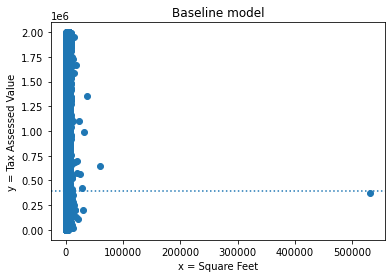

In [12]:
# plot data with baseline:

plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.axhline(train.taxvaluedollarcnt.mean(), ls = ':')
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('Baseline model');

In [13]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_train)

In [14]:
train['yhat'] = predictions

In [15]:
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat
410426,1550,357034,398734.95404,357264.612498
533217,1800,287774,398734.95404,399104.649483
695362,1542,588738,398734.95404,355925.731315
729442,1128,290984,398734.95404,286638.630067
524897,396,34541,398734.95404,164131.001774


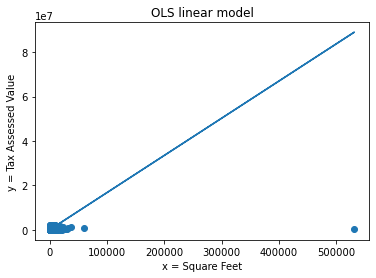

In [16]:
# visualize the line of best fit from OLS linear model
plt.scatter(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
plt.plot(train.calculatedfinishedsquarefeet, train.yhat)
plt.xlabel('x = Square Feet')
plt.ylabel('y = Tax Assessed Value')
plt.title('OLS linear model');

### 3. Plot the residuals for the linear regression model that you made.

In [17]:
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat
410426,1550,357034,398734.95404,357264.612498
533217,1800,287774,398734.95404,399104.649483
695362,1542,588738,398734.95404,355925.731315
729442,1128,290984,398734.95404,286638.630067
524897,396,34541,398734.95404,164131.001774


In [18]:
# residual = actual - predicted
train['residual'] = train.taxvaluedollarcnt - train.yhat
train['baseline_residual'] = train.taxvaluedollarcnt - train.baseline

In [19]:
train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual
410426,1550,357034,398734.95404,357264.612498,-230.612498,-41700.95404
533217,1800,287774,398734.95404,399104.649483,-111330.649483,-110960.95404
695362,1542,588738,398734.95404,355925.731315,232812.268685,190003.04596
729442,1128,290984,398734.95404,286638.630067,4345.369933,-107750.95404
524897,396,34541,398734.95404,164131.001774,-129590.001774,-364193.95404


Negative Residual = Prediction too high

Positive Residual = Prediction too low

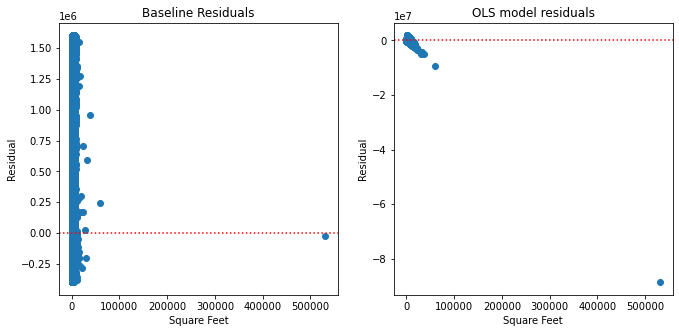

In [20]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.calculatedfinishedsquarefeet, train.residual)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [21]:
baseline_residual_min = train.baseline_residual.min()
baseline_residual_max = train.baseline_residual.max()
residual_min = train.residual.min()
residual_max = train.residual.max()

In [22]:
residual_min, residual_max

(-88611467.43732077, 1811275.480888729)

Negative Residual = Prediction too high
Positive Residual = Prediction too low


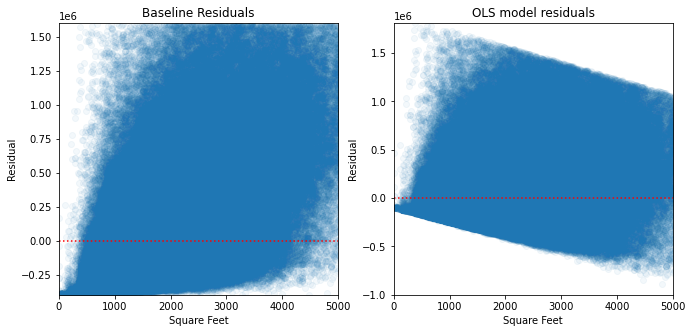

In [23]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.calculatedfinishedsquarefeet, train.baseline_residual, alpha=.05)
plt.axhline(y = 0, ls = ':', color = 'red')
plt.xlim(0,5000)
plt.ylim(baseline_residual_min, baseline_residual_max)
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.calculatedfinishedsquarefeet, train.residual, alpha=0.05)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlim(0,5000)
plt.ylim(-1_000_000, residual_max)
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals')
print("Negative Residual = Prediction too high")
print("Positive Residual = Prediction too low")

#### Takeaway:
- Presence of a slope in the residual plot suggests the need for additional predictors

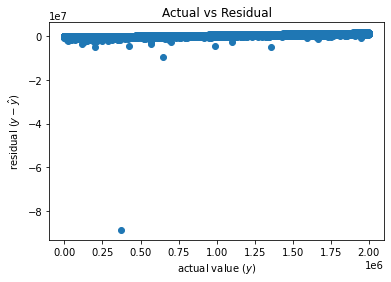

In [24]:
# Residual plot (y vs residual)
actual = train.taxvaluedollarcnt
predicted = train.yhat
residuals = actual - predicted
plt.hlines(0, actual.min(), actual.max(), ls=':')
plt.scatter(actual, residuals)
plt.ylabel('residual ($y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Residual')
plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [25]:
train['residual^2'] = train.residual**2
train['baseline_residual^2'] = train.baseline_residual**2

train.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
410426,1550,357034,398734.95404,357264.612498,-230.612498,-41700.95404,5.318212e+04,1.738970e+09
533217,1800,287774,398734.95404,399104.649483,-111330.649483,-110960.95404,1.239451e+10,1.231233e+10
695362,1542,588738,398734.95404,355925.731315,232812.268685,190003.04596,5.420155e+10,3.610116e+10
729442,1128,290984,398734.95404,286638.630067,4345.369933,-107750.95404,1.888224e+07,1.161027e+10
524897,396,34541,398734.95404,164131.001774,-129590.001774,-364193.95404,1.679357e+10,1.326372e+11


#### Calculating SSE

In [26]:
SSE = train['residual^2'].sum()
SSE_baseline = train['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 86976467113804000.0
SSE Baseline = 115464233692208544.0


In [27]:
SSE < SSE_baseline

True

#### Calculating MSE

In [28]:
len(train)
train.shape[0]

1172966

In [29]:
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  74150885118.4
MSE baseline =  98437835105.4


#### Calculating RMSE

In [30]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  272306.6
RMSE baseline =  313748.0


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [31]:
if SSE < SSE_baseline:
    print('OLS Regression Model Performs Better than Baseline')
else:
    print('OLS Regression Model Performs Worse than Baseline')

OLS Regression Model Performs Better than Baseline


### 7. What is the amount of variance explained in your model?

In [32]:
# calculate R2 manually:

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline = train['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = train['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

0.2467237313880591

In [33]:
# calculate R2 the easy way:

from sklearn.metrics import r2_score
r2_score(train.taxvaluedollarcnt, train.yhat)

0.24672373138805914

### Is your model better than the baseline model?

In [34]:
X2 = sm.add_constant(train.calculatedfinishedsquarefeet)
est = sm.OLS(train.taxvaluedollarcnt, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                 3.842e+05
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:14:49   Log-Likelihood:            -1.6344e+07
No. Observations:             1172966   AIC:                         3.269e+07
Df Residuals:                 1172964   BIC:                         3.269e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- OLS Regression Model outperformed baseline model on test using RMSE as evaluation metric
    - OLS Regression Model RMSE: 272306.6
    - Baseline Regression Model: 313748.0
    
However, overall the OLS Regression Model does a poor job of evaluating home price. The dollar amount of error would be unacceptable to any buyer/seller. 

### 9. Create a file named evaluate.py that contains the following functions.

In [35]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

In [36]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

In [37]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline


### B1. Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [38]:
from pydataset import data

tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.



In [40]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(tips[['total_bill']], tips.tip)

# make prediction
tips['yhat'] = lm.predict(tips[['total_bill']])

In [41]:
# make a baseline prediction (mean of the tip)
tips['baseline'] = tips.tip.mean()

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

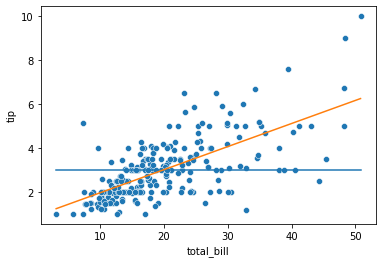

In [43]:
# plot data and prediction line

sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)
sns.lineplot(x = 'total_bill', y = 'baseline', data = tips)
sns.lineplot(x = 'total_bill', y = 'yhat', data = tips)

3. Plot the residuals for the linear regression model that you made.



In [44]:
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline

In [45]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


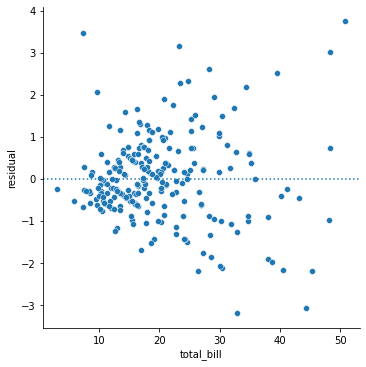

In [46]:
sns.relplot(x = 'total_bill', y = 'residual', data = tips)
plt.axhline(0, ls = ':')

Heteroscedasticity: 
  - unequal variance of errors
  - Heteroscedasticity may also have the effect of giving too much weight to a small subset of the data (namely the subset where the error variance was largest) when estimating coefficients.
  - possibily apply some transformations(?)


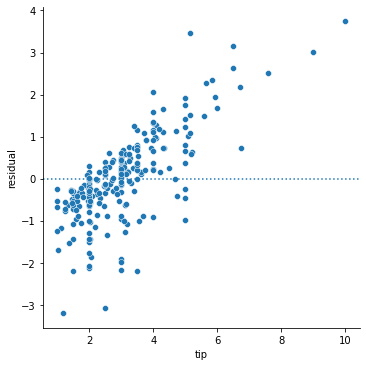

In [47]:
# residual plot (tip vs residuals)

sns.relplot(x = 'tip', y = 'residual', data = tips)
plt.axhline(0, ls = ':')

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


In [49]:
SSE = (tips.residual**2).sum()
print(f' The SSE of the OLS model is {round(SSE,1)}')

 The SSE of the OLS model is 252.8


In [50]:
SSE_baseline = (tips.baseline_residual**2).sum()
print(f' The SSE of the baseline model is {round(SSE_baseline,1)}')

 The SSE of the baseline model is 465.2


In [51]:
#Mean squared error OLS:

MSE = SSE/len(tips)
MSE

1.036019442011377

In [52]:
#Mean squared error of baseline model:

MSE_baseline = SSE_baseline/len(tips)
MSE_baseline

1.906608512496641

In [53]:
# RMSE of OLS model
RMSE = mean_squared_error(tips.tip, tips.yhat, squared = False)
RMSE

1.0178504025697377

In [54]:
# RMSE for the baseline model
RMSE_baseline = mean_squared_error(tips.tip, tips.baseline, squared = False)
RMSE_baseline

1.3807999538298954

In [55]:
# ESS = sum(tips.yhat - tips.tip.mean())**2

ESS = sum((tips.yhat - tips.baseline)**2)
ESS

212.42373319840434

In [56]:
# Total Sum of Errors

TSS = ESS + SSE
TSS

465.21247704918034

5. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [57]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])


df_eval

,metric,model_error
0,SSE,252.788744
1,MSE,1.036019
2,RMSE,1.017850


In [58]:
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])

df_eval

,metric,model_error,baseline_error
0,SSE,252.788744,465.212477
1,MSE,1.036019,1.906609
2,RMSE,1.017850,1.380800


In [59]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error

In [60]:
df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


7. What is the amount of variance explained in your model?

In [61]:
from sklearn.metrics import r2_score
r2_score(tips.tip, tips.yhat)

0.45661658635167657

In [62]:
better_than_baseline(tips.tip, tips.yhat)

True

### B2. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [63]:
mpg = data('mpg')

In [64]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


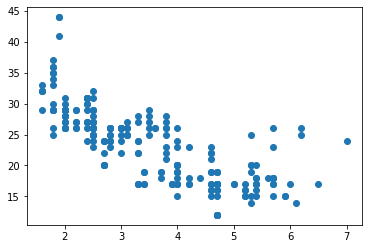

In [65]:
#plot displacement vs highway mpg

plt.scatter(mpg.displ, mpg.hwy)

In [66]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(mpg[['displ']], mpg.hwy)

# make prediction
predictions = lm.predict(mpg[['displ']])

Text(0, 0.5, 'highway mpg')

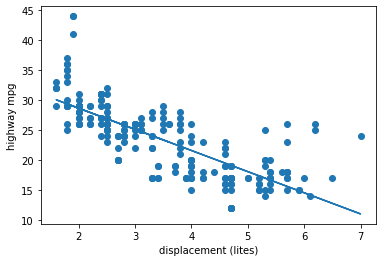

In [67]:
# plot regression line

plt.scatter(mpg.displ, mpg.hwy)
plt.plot(mpg.displ, predictions)
plt.xlabel('displacement (lites)')
plt.ylabel('highway mpg')

Text(0.5, 0, 'displacement (liters)')

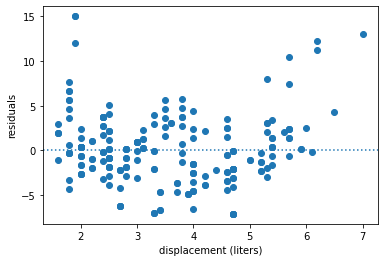

In [68]:
# plot displacement vs residuals

plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')
plt.ylabel('residuals')
plt.xlabel('displacement (liters)')

In [69]:
# calculate regressions errors
regression_errors(mpg.hwy, predictions)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
dtype: float64

In [70]:
# is our model better than baseline?

better_than_baseline(mpg.hwy, predictions)

True

In [71]:
# R2 score

r2_score(mpg.hwy, predictions)

0.5867866723989039